In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import open3d as o3d
import numpy as np
import time

path = "/home/mias/Datasets/carla_pothole"

img = cv2.imread('/home/mias/Datasets/carla_pothole/rgb/371.jpeg')
arr = np.load("3294.npy")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


255

In [3]:
scales = np.array([65536.0, 256, 1, 0]) / (256**3 - 1) * 1000
depth_image = np.dot(arr, scales).astype(np.float32)

In [4]:
# vis = o3d.visualization.Visualizer()

# initialize pointcloud instance.
pcd = o3d.geometry.PointCloud()

######## 未加几何 #########
# points = [[j, i, depth_image[i][j]] for j in range(depth_image.shape[1]) for i in range(depth_image.shape[0])]
points = []
colors = []
for i in range(depth_image.shape[0]):
    for j in range(depth_image.shape[1]):
        if depth_image[i][j] > 999:
            continue
        points.append([(i-depth_image.shape[0]/2)*depth_image[i][j]/1000, (j-depth_image.shape[1]/2)*depth_image[i][j]/1000, depth_image[i][j]])
        colors.append(img[i][j])
        
#################

pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(np.array(colors) / 255.0)




In [4]:
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)
o3d.visualization.ViewControl.set_zoom(vis.get_view_control(), 0.8)
o3d.visualization.ViewControl.set_front(vis.get_view_control(), [-1,0,0])
o3d.visualization.ViewControl.set_up(vis.get_view_control(), [-1,0,0])
o3d.visualization.ViewControl.set_lookat(vis.get_view_control(), [0,0,0])

# vis.run()
# o3d.visualization.draw_geometries([pcd], window_name="depth")

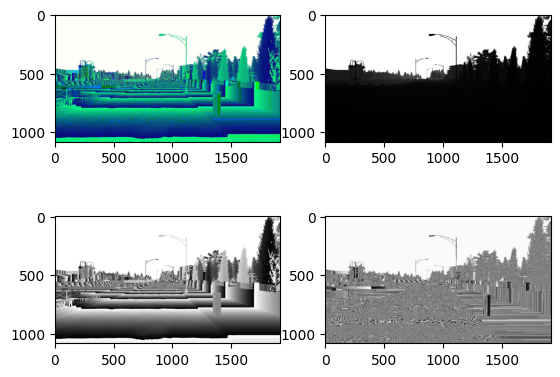

In [78]:
# converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# cv2.imshow(img)
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(arr[:,:,0], cmap='gray')
plt.subplot(223), plt.imshow(arr[:,:,1], cmap='gray')
plt.subplot(224), plt.imshow(arr[:,:,2], cmap='gray')

plt.show()

In [146]:
img[i][j]

array([15, 21, 26], dtype=uint8)